# **Módulo 2: Implementación del modelo de una sola neurona usando clases**

## Introducción
Ahora que hemos explicado las clases como conceptos abstractos de Python, volveremos a los modelos de una sola neurona que implementamos antes. Al incluir las clases en la implementación, nos acercamos un paso más a las librerías de *deep learning* que utilizaremos en el futuro.

Recordemos que habíamos aplicado el modelo a una tarea de regresión, en la que predecimos un valor real $\hat{y}^{(i)} = f(x^{(i)})$ para un punto de datos $i$ (donde hemos utilizado la notación con subíndice $(i)$ para señalar los puntos de datos $n$ que estamos considerando).

Tomaremos las funciones que desarrollamos antes para implementar el cálculo directo de $y$ y su gradiente respecto a los pesos, pero las convertiremos en métodos de una clase de Python llamada SingleNeuronModel. Esto nos permitirá guardar los pesos como variables miembro de cada instancia específica de la clase.

## NumPy

Además de convertir los modelos en clases, también utilizaremos la [biblioteca de NumPy](https://numpy.org/) para representar los vectores en vez de listas estándar de Python. NumPy nos ofrece numerosas operaciones matemáticas que aplicar a los vectores y los *arrays*, además de ciertas ventajas respecto a las listas estándar, como la capacidad de escribir código más conciso y mejoras de rendimiento. Más abajo, incluimos una breve introducción a las funciones de NumPy que utilizaremos en este cuaderno. Si quiere consultar una guía más detallada o recursos adicionales, puede visitar la página de tutoriales de numpy.org [aquí](https://numpy.org/devdocs/user/quickstart.html).

In [3]:
# En primer lugar, importamos la librería de NumPy, normalmente con la abreviatura np
import numpy as np

# Se puede crear un array de NumPy a partir de una lista
x = np.array([1,2,3,4])
y = [1,2,3,4]
z = np.array(y)

print("x:", x)
print("y:", y)
print("z:", z)
print("Notice the difference between the numpy arrays x and z and the python list y.")

# En vez de utilizar la propiedad "length" como las listas, NumPy es capaz de representar
# arrays multidimensionales. Podemos ver las dimensiones utilizando la propiedad "shape"
print("Shape of x:", x.shape)
# Aquí, vamos a crear un array multidimensional de 2x3 lleno de 1
a = np.ones((2,3))
print("A multidimensional array")
print(a)
print("Shape of a:", a.shape)

# Una de las grandes ventajas de NumPy es que nos permite realizar operaciones
# con estos vectores (o, generalmente, con arrays) sin necesidad de bucles "for"
x = np.array([1,2])
w = np.array([2,2])
z = np.dot(x, w.T)
print("The dot product of x and transpose of w is:", z)

# También podemos realizar restas y multiplicaciones escalares
learning_rate = .01
# Como vamos a realizar restas con floats, tenemos que asegurarnos de inicializar
#  w_new correctamente con el float 0. y no con el integer 0
w_new = np.array([0.,0.])
## w_new = np.array([0,0]) Este código no funcionará
w_new -= learning_rate * x

print("The value of w_new:", w_new)

# Esta introducción cubre todas las funciones de NumPy que vamos a usar en este cuaderno
# Si quiere una explicación más detallada, puede consultar:
# https://numpy.org/devdocs/user/quickstart.html

x: [1 2 3 4]
y: [1, 2, 3, 4]
z: [1 2 3 4]
Notice the difference between the numpy arrays x and z and the python list y.
Shape of x: (4,)
A multidimensional array
[[1. 1. 1.]
 [1. 1. 1.]]
Shape of a: (2, 3)
The dot product of x and transpose of w is: 6
The value of w_new: [-0.01 -0.02]


## Modelos de una sola neurona

Primero, repasemos el concepto de modelos de una sola neurona.

Este modelo consiste en una única neurona o nodo que suma multiplicaciones ponderadas de los atributos de una muestra de *input*, añade el sesgo y, a continuación, aplica al sumatorio una función de activación. Para los casos de regresión, utilizaremos una función de activación lineal, es decir, una función de identidad. Para la clasificación, utilizaremos una función sigmoide.

Más concretamente, el modelo toma el producto escalar de un ejemplo de *input* de entrenamiento $x^{(i)}$ con pesos aprendidos $w$, añadiendo un sesgo aprendido $w_0$ para generar una preactivación $z$. Después, aplicamos una función de activación $f$ a $z$ para generar una activación $a$, que en el caso de esta única neurona será nuestro *output* predicho $\hat{y}$. Es importante saber que $x$ y $w$ pueden ser vectores, que ahora representaremos como *arrays* de NumPy en el código de Python. Utilizaremos una notación con subíndices (p. ej.: $x_j$) para indicar el atributo $j$ dentro del *input* de datos $x$, donde $j$ va desde 1 hasta $m$ atributos totales.

La notación matemática formal de este modelo de una sola neurona es la siguiente:

$$
z = x \cdot w^T + w_0\\
a = f(z) \\
y = a
$$

En esta, $x$ y $w$ son vectores de fila, y la función de activación $f$ opera sobre el vector $z.$ para generar un escalar $a.$

## Modelo de regresión de una sola neurona

En el siguiente bloque de código, implementaremos la estructura necesaria para crear una clase de Python que sea un modelo de regresión de una sola neurona. Utilizará una función lineal $f(z) = z$ como función de activación. Es muy similar, en cuanto a capacidad, a lo que creamos en el último cuaderno.

In [4]:
# Primero, debemos importar los paquetes que se utilizarán para la visualización
# Este paso se explicará en otro cuaderno, no es necesario que le preste atención ahora
import numpy as np
import math, random
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

class SingleNeuronRegressionModel():
    def __init__(self, in_features):
        # Crear/inicializar los pesos para el número de atributos
        self.w = np.zeros(in_features)
        self.w_0 = 0.

    def forward(self, x):
        if (x.shape != self.w.shape):
            raise ValueError("shape of input x and weights w should be same")
        
        # Calcular la preactivación z
        z = x @ self.w.T + self.w_0
    
        # Aplicar la función de activación y devolver
        a = self.linear(z)
        return a
  
    # Función de activación lineal simple: solo devuelve la identidad
    def linear(self, z):
        return z

In [5]:
# Output de prueba del modelo para un único punto de datos de 2D:
regression_model = SingleNeuronRegressionModel(in_features=2)
regression_model.w = np.array([5, 3])
regression_model.w_0 = -8

x = np.array([1,2])
y = regression_model.forward(x)
print("input", x, "=> output", y)

input [1 2] => output 3


## Entrenar el modelo de regresión mediante descenso de gradiente

Ahora que hemos implementado una clase de modelo de regresión, queremos implementar también el mismo algoritmo de entrenamiento que utilizamos antes. Recordemos que nos interesa minimizar una función de coste, $J$, en la que $J$ es la *pérdida* $L$ total en todos los datos de entrenamiento:

$$ J = \sum_i^n L(\hat{y}^{(i)}, y^{(i)})$$

Para este sencillo ejemplo, utilizaremos la pérdida del error cuadrático (EC), donde $\epsilon^{(i)}$ es el error para cualquier muestra $i$ dada:

$$ L_{SE}(\hat{y}^{(i)}, y^{(i)}) = \frac{1}{2} (\hat{y_i} - y_i)^2 = \frac{1}{2} \epsilon^2 $$


Recordemos también el proceso de entrenamiento del último cuaderno:
* Se completa el bucle de entrenamiento para un número especificado de iteraciones en todo el conjunto de datos (lo que también se conoce como ciclos)
* En cada ciclo, observa todos los pares de *input* y *output*  (𝑥(𝑖),𝑦(𝑖)) . Para cada uno:

  * Se calcula la pérdida $L$ entre el valor correcto $y$ y el valor predicho $\hat{y}$
  * Se calcula el gradiente de la pérdida respecto a cada peso
  * Se actualizan los pesos en función del gradiente y la tasa de aprendizaje, $\eta$:
  
$$ w_{j,new} = w_j - \eta \frac{dJ}{dw_j}$$


Aunque estamos implementando el modelo de una sola neurona como clase, el concepto básico del aprendizaje basado en el gradiente sigue siendo el mismo: empujamos cada peso a lo largo del gradiente de la función de coste respecto a ese peso. Sin embargo, ahora el lugar donde se almacenan esos pesos es diferente y específico para cada instancia de la clase.

### Descenso de gradiente con pérdida del error cuadrático (EC)

Como referencia, repetimos la explicación de la pérdida del error cuadrático.

En este caso, para cualquier punto de datos $i$, funciona lo siguiente:

$$ \frac{dJ}{dw_j} = \frac{dL_{SE}}{dw_j}  
  = \frac{dL_{SE}}{d\hat{y}} \frac{d\hat{y}}{dw_j} 
  = (\hat{y} - y) \frac{d\hat{y}}{dw_j} $$

Vemos que es necesario poder calcular el gradiente del  *output* del modelo $\hat{y}$ respecto a cada peso:

$$ \frac{d\hat{y}}{dw_j} = \frac{df(z)}{dz} \frac{dz}{dw_j} $$

Para la función de activación lineal $f(z) = z$, el primer término es muy simple: $\frac{df(z)}{dz} = 1$.

Para el segundo, recordemos que:

$$ z = w_0 + x_1 \cdot w_1 + \cdots + x_j \cdot w_j + \dots + x_m \cdot w_m $$

so $\frac{dz}{dw_j} = x_j$, except for $w_0$, where $\frac{dz}{dw_0} = 1.$ 

### ### Implementación del descenso de gradiente -- Pérdida del error cuadrático

In [6]:
# Primero, actualizar la clase con un método de gradiente
class SingleNeuronRegressionModel():
    def __init__(self, in_features):
        # Crear/inicializar los pesos para el número de atributos
        self.w = np.zeros(in_features)
        self.w_0 = 0.

    def forward(self, x):
        # Calcular la preactivación z
        z = x @ self.w.T + self.w_0
    
        # Aplicar la función de activación y devolver
        a = self.linear(z)
        return a
  
    # Función de activación lineal simple: solo devuelve la identidad
    def linear(self, z):
        return z
    
    # Calcular y guardar el gradiente del output
    # respecto a cada peso para la activación lineal
    def gradient(self, x):
        self.grad_w = x
        self.grad_w_0 = 1.
        
    # Actualizar los pesos en función de los gradientes y la tasa de aprendizaje
    def update(self, grad_loss, learning_rate):
        # Aquí, grad_loss es el gradiente de la pérdida respecto al output
        # Se añade de forma externa, a partir de la función de pérdida
        # que se esté utilizando para entrenar al modelo
        model.w   -= grad_loss * self.grad_w   * learning_rate
        model.w_0 -= grad_loss * self.grad_w_0 * learning_rate

In [7]:
# Ahora, la función de entrenamiento toma una instancia del modelo
# de una sola neurona como argumento
#
# También organizamos los datos de input (input_data) como un array, num_samples x in_features
# y los datos de output (univariados) como un array con num_samples dimensiones
def train_model_SE_loss(model, input_data, output_data, 
                        learning_rate, num_epochs):
    num_samples = len(input_data)
    for epoch in range(1, num_epochs+1):
        total_loss = 0 #Hacer un seguimiento de la pérdida total en todo el conjunto de datos
            
        for i in range(num_samples):
            x = input_data[i, ...]
            y = output_data[i]
            y_predicted = model.forward(x)

            # Función de pérdida
            error = y_predicted - y
            loss = (error**2)/2
            total_loss += loss

            # Gradiente de la predicción respecto a los pesos
            model.gradient(x)
            
            # Gradiente de la pérdida respecto a la predicción para el EC
            grad_loss = error 
            
            # Actualizar el modelo en función de los gradientes
            model.update(grad_loss, learning_rate)
           
        report_every = max(1, num_epochs // 10)
        if epoch == 1 or epoch % report_every == 0: #every few epochs, report
            print("epoch", epoch, "has total loss", total_loss)

In [8]:
# Utilizaremos esta función para evaluar el rendimiento
# del modelo de regresión entrenado. Calculará el error cuadrático medio de los datos
def evaluate_regression_accuracy(model, input_data, output_data):
    total_loss = 0
    num_samples = len(input_data)
    for i in range(num_samples):
        x = input_data[i,...]
        y = output_data[i]
        y_predicted = model.forward(x)
        error = y_predicted - y
        total_loss += (error**2)/2
    accuracy = total_loss / num_samples
    print("Our model has mean square error of", accuracy)
    return accuracy

## Ejemplo de regresión con una sola neurona

Ahora que tenemos la función del modelo de regresión y la función de entrenamiento, solo falta ejecutarlas en un conjunto de datos. Más abajo, entrenaremos la neurona con un conjunto de datos de prueba y visualizaremos el ajuste.

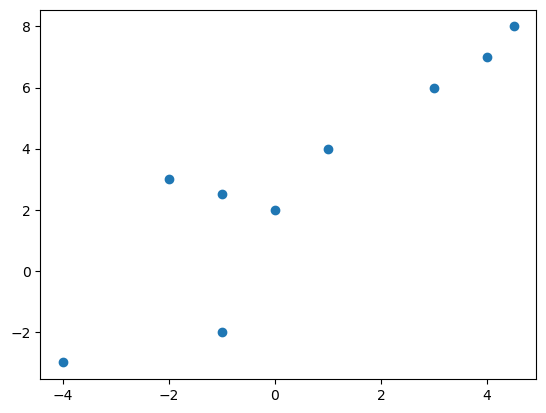

In [9]:
# Aquí tenemos un conjunto simple de 1D de datos de input: una serie de puntos x, cada uno de ellos es una lista de longitud 1
# con una respuesta y correspondiente.
X_1D = np.array([[1], [-2], [3], [4.5], [0], [-4], [-1], [4], [-1]])
Y_1D = np.array([4,   3,    6,   8,     2,   -3,   -2,   7,   2.5])

# Esta función nos permitirá visualizar un conjunto de datos de 1D,
# pero no necesita entender este paso todavía.
def plot_dataset_1D(x, y):
    x_np = np.array(x)
    y_np = np.array(y)
    plt.scatter(x_np[...,0], y_np)

# Esta función nos permitirá visualizar el ajuste de 1D
def plot_fit_1D(X, model):
    ylim = plt.ylim()
    x_np = np.array(X)
    y_pred = np.array([model.forward(x) for x in X])
    plt.plot(x_np[...,0], y_pred, color="red")
    #plt.scatter(x_np[...,0], y_pred, color="red")
    plt.ylim(ylim)
    
# Visualizar el conjunto de datos de arriba
plot_dataset_1D(X_1D, Y_1D)
#plot_fit_1D(X_1D, [1, 2], 0.5)

### Aprender los pesos para el modelo de regresión

epoch 1 has total loss 75.15118164194563
epoch 10 has total loss 15.91945696552539
epoch 20 has total loss 12.004141710251176
epoch 30 has total loss 11.347063947860194
epoch 40 has total loss 11.234328476762197
epoch 50 has total loss 11.213995802293752
epoch 60 has total loss 11.209941165400341
epoch 70 has total loss 11.20898841694995
epoch 80 has total loss 11.208716012559227
epoch 90 has total loss 11.208624266940278
epoch 100 has total loss 11.208590113287263

Final weights:
[1.20325818] 2.4556015377014955
Our model has mean square error of 1.2040220467545657


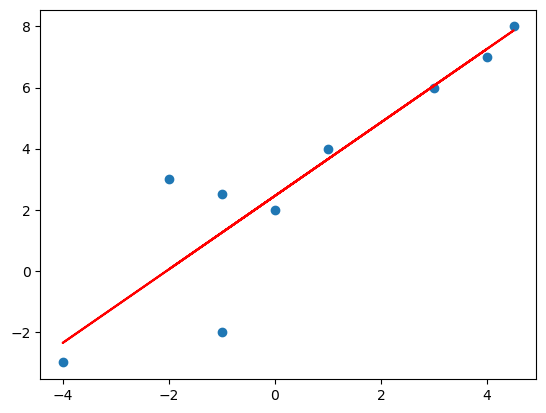

In [10]:
# En este ejemplo establecemos una tasa de aprendizaje relativamente baja
learning_rate = 0.01
epochs = 100

# Creamos una instancia de la clase SingleNeuronRegressionModel
# antes de empezar el proceso de entrenamiento
model = SingleNeuronRegressionModel(in_features=len(X_1D[0]))
train_model_SE_loss(model, X_1D, Y_1D, learning_rate, epochs)
print("\nFinal weights:")
print(model.w, model.w_0)
evaluate_regression_accuracy(model, X_1D, Y_1D)

plot_dataset_1D(X_1D, Y_1D)
plot_fit_1D(X_1D, model)

# Clase base para un modelo de una sola neurona

 Al observar nuestra primera clase de regresión, nos damos cuenta de que no es muy flexible. Solo podemos completar tareas de regresión con una función de activación lineal. Para resolver ese problema, creamos una clase SingleNeuronModel que aloje distintos tipos de modelos de una sola neurona.

Para cada una de estas clases, las variables miembro $w$ y $w_0$ siguen siendo las mismas, junto con la función **forward**.

Las funciones de  **activación** y **gradiente** se quedarán sin implementar en la clase padre, y cada clase hija tendrá que implementarlas por su cuenta. Eso es lo que diferencia los modelos de una sola neurona. Más abajo, incluimos un ejemplo de implementación de la clase padre SingleNeuronModel junto con una reimplementación de SingleNeuronRegressionModel tomada del caso que aparece más arriba y una implementación de SingleNeuronClassificationModel tomada del último cuaderno.

## Modelo de clasificación de una sola neurona
Para el problema de clasificación, solo tenemos que implementar unos cuantos cambios. En primer lugar, cambiamos la función de activación por una sigmoide. Esto reduce la preactivación $z$ a una activación (*output*) con un valor entre 0 y 1. También tenemos que implementar el cálculo de gradiente con esta función de activación sigmoide.

### Descenso de gradiente con pérdida de log-verosimilitud negativa (NLL)

Como referencia, repetimos la explicación del descenso de gradiente para la pérdida de log-verosimilitud negativa.

En el caso de la pérdida de NLL, para cualquier punto de datos de muestra $i$, el gradiente de $J$ respecto a los pesos será:

$$ \frac{dJ}{dw_j} = \frac{dL_{NLL}}{dw_j}  
  = \frac{dL_{NLL}}{d\hat{y}} \frac{d\hat{y}}{dw_j}  
  = \frac{dL_{NLL}}{d\hat{y}} \frac{d\hat{y}}{dz} \frac{dz}{dw_j} 
  = \frac{dL_{NLL}}{d\hat{y}} \frac{d\sigma{(z)}}{dz} \frac{dz}{dw_j} .
 $$

Para el primer término, volveremos a llamar la definición $L_{NLL} = y \log{\hat{y}} + (1-y)\log{(1-\hat{y})}$, lo que nos da el siguiente resultado:

$$ \frac{dL_{NLL}}{d\hat{y}} = \frac{y-\hat{y}}{\hat{y}(1-\hat{y})} .$$

Para el segundo, con la derivada de la función de activación $\sigma(z)$, obtenemos:

$$ \frac{d\sigma{(z)}}{dz} = \sigma(z)(1-\sigma(z)  = \hat{y}(1-\hat{y}).$$

El último término es simplemente $\frac{dz}{dw_j} = x$, salvo por $\frac{dz}{dw_0} = 1$.


In [11]:
# Ahora, modificamos la implementación para crear una clase SingleNeuronModel abstracta 
# que actúe como padre de los modelos de clasificación y regresión
class SingleNeuronModel():

    def __init__(self, in_features):
        #self.w = np.zeros(in_features)
        #self.w_0 = 0.
        # Es preferible definir los pesos iniciales como valores pequeños distribuidos de forma normal
        self.w = 0.01 * np.random.randn(in_features)
        self.w_0 = 0.01 * np.random.randn()
        self.non_zero_tolerance = 1e-8 # add this to divisions to ensure we don't divide by 0

        
    def forward(self, x):
        # Calcular y guardar la preactivación z
        self.z = x @ self.w.T + self.w_0
    
        # Aplicar la función de activación y devolver
        self.a = self.activation(self.z)
        return self.a
  
    def activation(self, z):
        raise ImplementationError("activation method should be implemented by subclass")
    
    # Calcular y guardar el gradiente del output respecto a los pesos
    def gradient(self, x):
        raise ImplementationError("gradient method should be implemented by subclass")
        
    # Actualizar los pesos en función de los gradientes y la tasa de aprendizaje
    def update(self, grad_loss, learning_rate):
        self.w   -= grad_loss * self.grad_w   * learning_rate
        self.w_0 -= grad_loss * self.grad_w_0 * learning_rate

        
# Reimplementar el modelo de regresión de una sola neurona usando la base SingleNeuronModel
class SingleNeuronRegressionModel(SingleNeuronModel):
    # Función de activación lineal para el modelo de regresión
    def activation(self, z):
        return z
    
    # Gradiente del output respecto a los pesos para la activación lineal
    def gradient(self, x):
        self.grad_w = x
        self.grad_w_0 = 1.

        
# ¡Nueva implementación! Modelo de clasificación de una sola neurona
class SingleNeuronClassificationModel(SingleNeuronModel):
    # Función de activación sigmoide para la clasificación
    def activation(self, z):
        return 1 / (1 + np.exp(-z) + self.non_zero_tolerance)

    # Gradiente del output respecto a los pesos para la activación sigmoide
    def gradient(self, x):
        self.grad_w = self.a * (1-self.a) * x
        self.grad_w_0 = self.a * (1-self.a)

In [12]:
# Test: output del modelo de regresión para un único punto de datos de 2D
model = SingleNeuronRegressionModel(in_features=2)
model.w = np.array([5, 3])
model.w_0 = -8

x = np.array([1,2])
y = model.forward(x)
print("input", x, "=> output", y)

input [1 2] => output 3


In [13]:
# Test: output del modelo de clasificación para un único punto de datos de 2D
model = SingleNeuronClassificationModel(in_features=2)
model.w = np.array([5, 3])
model.w_0 = -8

x = np.array([1,2])
y = model.forward(x)
print("input", x, "=> output", y)

input [1 2] => output 0.9525741177484588


## Ejemplo de clasificación con una sola neurona

Ahora, vamos a entrenar SingleNeuronClassificationModel. 

Recordemos que, para los problemas de clasificación, utilizamos una función de pérdida diferente, la de log-verosimilitud negativa (NLL). Esto permite que el código que escribimos antes siga funcionando, pero aplicado al problema de clasificación en vez de al de regresión.

In [14]:
# Proceso de entrenamiento, utilizando la pérdida de log-verosimilitud negativa,
# más adecuada para problemas de clasificación

def train_model_NLL_loss(model, input_data, output_data, 
                         learning_rate, num_epochs):
    non_zero_tolerance = 1e-8 # Añadir esto a los cálculos de log para garantizar que no tomamos el log de 0
    num_samples = len(input_data)
    for epoch in range(1, num_epochs+1):
        total_loss = 0 # Hacer un seguimiento de la pérdida total en todo el conjunto de datos
            
        for i in range(num_samples):
            x = input_data[i,...]
            y = output_data[i]
            y_predicted = model.forward(x)

            # Función de pérdida de NLL
            loss = -(y * np.log(y_predicted + non_zero_tolerance) + (1-y) * np.log(1-y_predicted + non_zero_tolerance))
            total_loss += loss

            # Gradiente de la predicción respecto a los pesos
            model.gradient(x)

            # Gradiente de la pérdida respecto a la predicción para NLL
            grad_loss = (y_predicted - y)/(y_predicted * (1-y_predicted))
            
            #Actualizar el modelo en función del gradiente
            model.update(grad_loss, learning_rate)
            
        report_every = max(1, num_epochs // 10)
        if epoch == 1 or epoch % report_every == 0: # Cada pocos ciclos, generar un informe
            print("epoch", epoch, "has total loss", total_loss)

In [27]:
# Utilizaremos esta función para evaluar el rendimiento de nuestro clasificador entrenado
def evaluate_classification_accuracy(model, input_data, labels):
    # Contar el número de muestras clasificadas correctamente dado un conjunto de pesos
    correct = 0
    num_samples = len(input_data)
    for i in range(num_samples):
        x = input_data[i,...]
        y = labels[i]
        y_predicted = model.forward(x)
        label_predicted = 1 if y_predicted > 0.5 else 0
        if label_predicted == y:
            correct += 1
        else:
            print("Misclassify", x, y, "with activation", y_predicted)
    accuracy = correct / num_samples
    print("Our model predicted", correct, "out of", num_samples,
          "correctly for", accuracy*100, "% accuracy")
    return accuracy

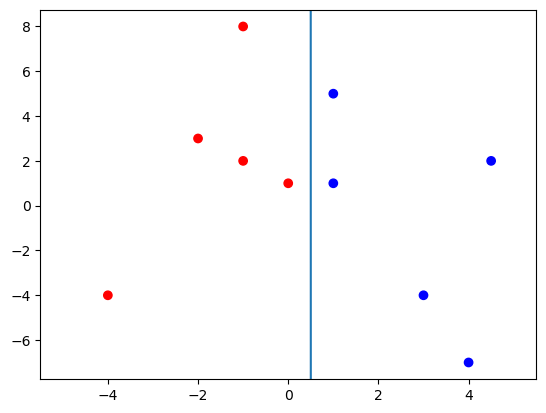

In [28]:
# Aquí tenemos un conjunto de datos compuesto por puntos de datos en 2D linealmente separables
input_data = np.array([[1, 1],
              [1, 5],
              [-2, 3],
              [3, -4],
              [4.5, 2],
              [0, 1],
              [-4, -4],
              [-1, 2],
              [4, -7],
              [-1, 8]])
# Y sus etiquetas correspondientes
labels = [1, 1, 0, 1, 1, 0, 0, 0, 1, 0]

# Esta función nos permitirá visualizar un conjunto de datos de 2D,
# pero no necesita entender este paso todavía.
def plot_dataset_2D(x, y):
    x_np = np.array(x)
    x_np.reshape(len(x), 2)
    colors = []
    for label in y:
        if label == 0:
            colors.append("red")
        else:
            colors.append("blue")
    plt.scatter(x_np[...,0], x_np[...,1], color=colors)

# Esta función nos permitirá visualizar una frontera de decisión de 2D
def plot_decision_boundary_2D(w, w_0):
    ylim = plt.ylim()
    x1 = np.arange(-5,6)
    plt.plot(x1, (-w_0 - w[0]*x1)/w[1])
    plt.ylim(ylim)
    
# Visualizar el conjunto de datos que aparece arriba
plot_dataset_2D(input_data, labels)
plot_decision_boundary_2D([1, 0.0001], -0.5)

A partir de este gráfico, vemos que el conjunto de datos es separable linealmente, lo que significa que podemos separar las muestras positivas (azules) de las negativas (rojas) con una sola línea.

## Entrenar pesos reales -- Clasificador de una sola neurona

Ahora que tenemos el conjunto de datos, queremos entrenar la clase SingleNeuronClassifier igual que antes. Recordemos que, para ello, tenemos tres elementos con los que jugar: los pesos iniciales, la tasa de aprendizaje y el número de ciclos. En los siguientes ejemplos, veremos cómo influye cada uno de ellos en la capacidad del modelo de converger en una frontera de decisión precisa.

Todo esto le debería resultar familiar, ya que estamos repitiendo los mismos ejercicios pero ahora con implementación de clase.

Recordemos también que, como regla general, nos interesa que la tasa de aprendizaje sea pequeña en comparación con los valores de los datos de *input*, que los pesos iniciales sean relativamente pequeños (a menudo inicializados al azar) y que el número de ciclos sea relativamente grande. Se ha investigado mucho sobre cómo definir los valores ideales para estos parámetros y esta explicación es una simplificación muy básica.

epoch 1 has total loss 6.3795592098343015
epoch 10 has total loss 3.1093303341584395
epoch 20 has total loss 2.4239592011575977
epoch 30 has total loss 2.0968128377173105
epoch 40 has total loss 1.8884782748221631
epoch 50 has total loss 1.7376870246375808
epoch 60 has total loss 1.6205324201608284
epoch 70 has total loss 1.5253526266900501
epoch 80 has total loss 1.4456122314944038
epoch 90 has total loss 1.3772868566137295
epoch 100 has total loss 1.317724589661409

Final weights:
[ 1.69320002 -0.08235849] -0.17442372500241188
Our model predicted 10 out of 10 correctly for 100.0 % accuracy


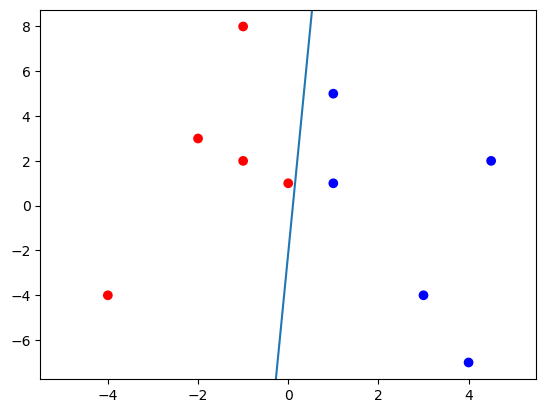

In [17]:
# En este ejemplo, establecemos una tasa de aprendizaje relativamente pequeña.
# Sin embargo, solo entrenamos durante unos pocos ciclos,
# así que no es suficiente para converger en un clasificador preciso.
# Podemos probar con distintos números de ciclos (o distintas tasas de aprendizaje)
# para encontrar un clasificador preciso.
learning_rate = 0.01
epochs = 10
epochs = 100

model = SingleNeuronClassificationModel(in_features=len(input_data[0]))

train_model_NLL_loss(model, input_data, labels, learning_rate, epochs)
print("\nFinal weights:")
print(model.w, model.w_0)
evaluate_classification_accuracy(model, input_data, labels)
plot_dataset_2D(input_data, labels)
plot_decision_boundary_2D(model.w, model.w_0)

In [18]:
# Intentar ejecutar el modelo y la pérdida con todas las X (input_data) e Y (etiquetas)
model.forward(input_data)

array([0.80789931, 0.75156638, 0.02171284, 0.99469934, 0.99931146,
       0.43615487, 0.0013346 , 0.11584895, 0.999235  , 0.07402176])

In [19]:
evaluate_regression_accuracy(model, input_data, labels)

Our model has mean square error of 0.015412779962256715


0.015412779962256715

## Práctica: Conjunto de datos en 3D

Ahora que hemos repetido los ejercicios sobre conjuntos de datos en 2D implementando clases, es el momento de hacer lo mismo con el conjunto en 3D.

<Axes3DSubplot:>

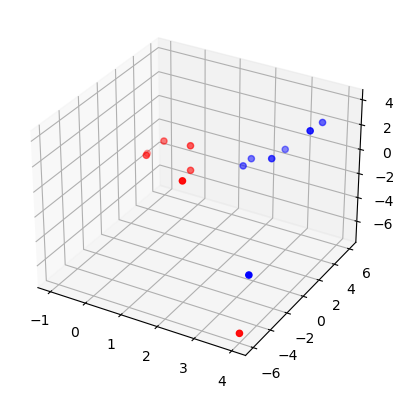

In [20]:
# Abajo aparece un conjunto de datos de 3D de muestras binarias etiquetadas. Debería poder utilizar
# las funciones ya existentes para entrenar un perceptrón que clasifique perfectamente
# el conjunto de datos con un plano de decisión model_function.
input_data = np.array([
     [1,1,1],
     [1,1,-1],
     [-1,4,-3],
     [2,4,-1],
     [3.5,6,2],
     [4,-6,-7],
     [2,-4,2],
     [4,-5,-3],
     [0,2,0],
     [3,2,1],
     [4,2,4],
     [2.5,6,-1],
     [0,0,0],
     [2,3,-1]])
labels = [0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1]

# Esta función nos permitirá mostrar el conjunto de datos en un gráfico en 3D,
# pero no necesita entender este paso todavía.
def plot_3d_dataset(x, y): 
    x_np_3d = np.array(x)
    x_np_3d.reshape(len(x),3)
    colors = []
    for label in y:
        if label == 0:
            colors.append("red")
        else:
            colors.append("blue")
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter3D(x_np_3d[...,0], x_np_3d[...,1],x_np_3d[...,2], color = colors)
    return ax

# Esta función de utilidad nos permitirá representar la frontera de decisión en 3D 
# para un conjunto de pesos dado
def plot_3d_decision_boundary(ax, w, w_0):
  x = np.linspace(-1,4,10)
  y = np.linspace(-1,6,10)
  X,Y = np.meshgrid(x,y)
  Z = (-X*w[0] - Y*w[1] - w_0)/w[2]
  surf = ax.plot_surface(X, Y, Z)
  ax.set_zlim(-10,5)
  return
plot_3d_dataset(input_data, labels)

epoch 1 has total loss 9.393281408890418
epoch 10 has total loss 7.136135762230133
epoch 20 has total loss 6.479757539483202
epoch 30 has total loss 5.97975674572697
epoch 40 has total loss 5.559401214773284
epoch 50 has total loss 5.199079930831986
epoch 60 has total loss 4.887629190855571
epoch 70 has total loss 4.616571452456085
epoch 80 has total loss 4.379079587525474
epoch 90 has total loss 4.1696124115934685
epoch 100 has total loss 3.9836688375550544

Final weights:
[1.05679485 0.37481169 0.18162254] -1.5804347258873586
Misclassify [1. 1. 1.] 0 with activation 0.5081978539795814
Our model predicted 13 out of 14 correctly for 92.85714285714286 % accuracy


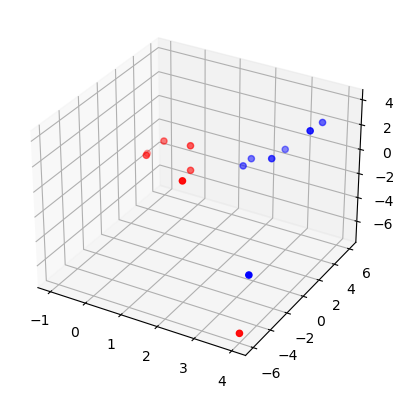

In [21]:
# PRÁCTICA: Complete el siguiente código para hallar un conjunto de pesos
# que clasifique el conjunto de datos con una precisión del 90 % o superior:

model = SingleNeuronClassificationModel(in_features=len(input_data[0]))

train_model_NLL_loss(model, input_data, labels, learning_rate, epochs)
print("\nFinal weights:")

print(model.w, model.w_0)
evaluate_classification_accuracy(model, input_data, labels)
ax = plot_3d_dataset(input_data, labels)

## Solución al ejemplo del conjunto de datos en 3D

epoch 1 has total loss 9.537436140332062
epoch 10 has total loss 7.1061832155102715
epoch 20 has total loss 6.454450049813281
epoch 30 has total loss 5.9582233763501735
epoch 40 has total loss 5.540952343506889
epoch 50 has total loss 5.183179970198335
epoch 60 has total loss 4.873837594052137
epoch 70 has total loss 4.604527829078355
epoch 80 has total loss 4.368491053659405
epoch 90 has total loss 4.1602414939626895
epoch 100 has total loss 3.975322809461429

Final weights:
[1.05921071 0.37549196 0.18159909] -1.5861357318075127
Misclassify [1. 1. 1.] 0 with activation 0.5075409318451481
Our model predicted 13 out of 14 correctly for 92.85714285714286 % accuracy


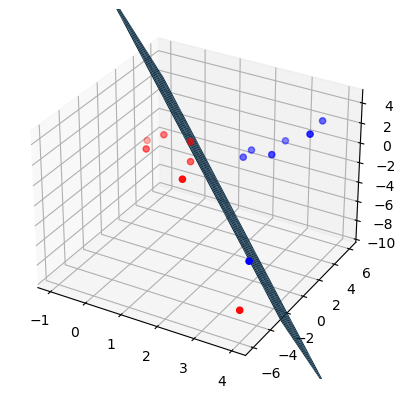

In [22]:
# En este ejemplo, establecemos una tasa de aprendizaje relativamente pequeña.
# Sin embargo, solo entrenamos durante unos pocos ciclos,
# así que no es suficiente para converger en un clasificador preciso.
learning_rate = 0.01
epochs = 100
#epochs = 1000

model = SingleNeuronClassificationModel(in_features=len(input_data[0]))

train_model_NLL_loss(model, input_data, labels, learning_rate, epochs)
print("\nFinal weights:")
print(model.w, model.w_0)
evaluate_classification_accuracy(model, input_data, labels)
ax = plot_3d_dataset(input_data, labels)
plot_3d_decision_boundary(ax, model.w, model.w_0)

## Datos no separables linealmente

Aunque las clases son una herramienta muy potente, siguen sin ser suficiente para permitir a los modelos de una sola neurona definir buenas fronteras de decisión para datos no separables linealmente.

Sin embargo, ahora que entendemos los fundamentos de las clases, podemos empezar a utilizar la completa librería de *machine learning*, [Pytorch](https://pytorch.org/). Esta librería utiliza todos los conceptos que hemos aprendido hasta ahora para crear redes neuronales muy sofisticadas que nos permiten trabajar con conjuntos de datos más complejos. En el módulo 3, exploraremos todo lo que nos ofrece esta gran librería.

Para refrescar los fundamentos de los conjuntos de datos no separables linealmente, hemos incluido una explicación más abajo. Aun con las nuevas clases que hemos implementado, no hemos podido encontrar un clasificador perfecto.

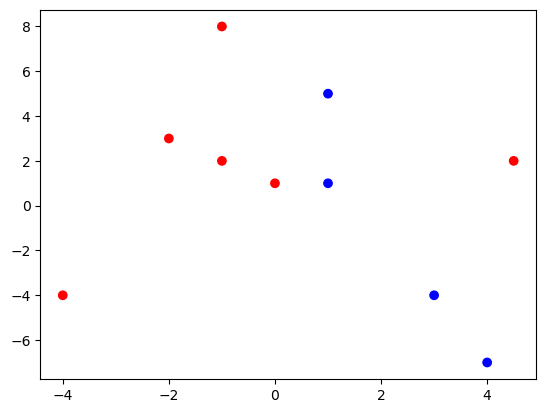

In [25]:
input_data = np.array([
     [1, 1],
     [1, 5],
     [-2, 3],
     [3, -4],
     [4.5, 2],
     [0, 1],
     [-4, -4],
     [-1, 2],
     [4, -7],
     [-1, 8]])
# Al cambiar la etiqueta del cuarto input [4.5, 2],
# hacemos que este conjunto de datos no sea separable linealmente
labels = [1, 1, 0, 1, 0, 0, 0, 0, 1, 0]

plot_dataset_2D(input_data, labels)

epoch 1 has total loss 6.704626730236365
epoch 100 has total loss 5.016279461534613
epoch 200 has total loss 5.0028558938408985
epoch 300 has total loss 5.002574491639973
epoch 400 has total loss 5.00271133913057
epoch 500 has total loss 5.002762881097198
epoch 600 has total loss 5.0027777743061765
epoch 700 has total loss 5.002781848193811
epoch 800 has total loss 5.002782947244801
epoch 900 has total loss 5.002783242663679
epoch 1000 has total loss 5.002783321993062

Final weights:
[ 0.45136506 -0.16969306] -0.6477719449332521
Misclassify [1. 1.] 1 with activation 0.40948374701144763
Misclassify [1. 5.] 1 with activation 0.26021100129473945
Misclassify [4.5 2. ] 0 with activation 0.7396181221450134
Our model predicted 7 out of 10 correctly for 70.0 % accuracy


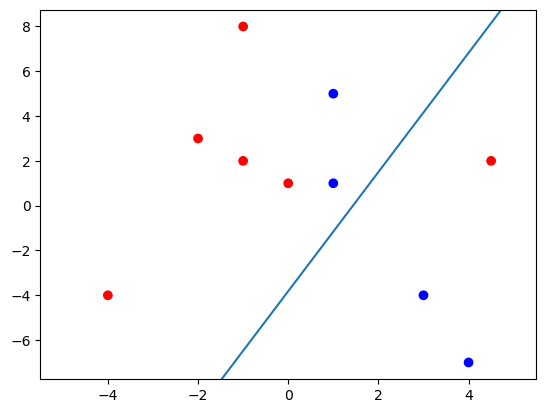

In [26]:
# Nuestro algoritmo de entrenamiento trata de aprender un modelo "bueno",
# aunque no consiga encontrar uno perfecto 
# (es decir, no existe un clasificador lineal de una sola neurona
# capaz de separar a la perfección estos datos).
learning_rate = 0.01
epochs = 1000

model = SingleNeuronClassificationModel(in_features=len(input_data[0]))

train_model_NLL_loss(model, input_data, labels, learning_rate, epochs)
print("\nFinal weights:")
print(model.w, model.w_0)
evaluate_classification_accuracy(model, input_data, labels)
plot_dataset_2D(input_data, labels)
plot_decision_boundary_2D(model.w, model.w_0)

## Perceptrones multicapa -- Hacia unas redes neuronales aún más profundas

En el módulo 3, utilizaremos Pytorch para introducir redes neuronales profundas que nos permitan resolver problemas como el que hemos visto. Pytorch cuenta con funciones que facilitan mucho la creación de redes de **múltiples capas** que contengan **múltiples nodos**. Veremos que esto permite tener fronteras de decisión más complejas que las líneas o los planos y funciona mejor con datos como los del caso anterior.